In [1]:
# This takes in output file of retrieved [Fe/H], finds matches with nSSPP output file,
# and plots comparison

# Created 2022 Aug. 9 by E.S.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stem = "/Users/bandari/Documents/git.repos/rrlfe/"

In [3]:
# read in our values

df_retrieved = pd.read_csv(stem + "rrlfe_io_20220809_01/bin/retrieved_vals_20220809.csv")

In [4]:
# read in nSSPP Fe/H values

df_nsspp = pd.read_csv(stem + "notebooks_for_development/data/nSSPP82.out", names=["sdss","spectrum", "teff", "logg",
                                                     "feh_direct_nsspp", "feh_beers"], delim_whitespace=True)
# read in S/N
df_s2n = pd.read_csv("./data/s2n_sdss_spec.csv")

#df_nsspp = pd.read_csv()

In [32]:
# make a column on the basis of which we can merge the tables

df_retrieved["name_match"] = df_retrieved["realization_spec_file_name"].str.split(pat="_noise_ver", expand=True)[0]
df_s2n["name_match"] = df_s2n["file_name"].str.split(pat=".dat", expand=True)[0]
df_nsspp["name_match"] = df_nsspp["spectrum"]
df_nsspp["name_match"] = df_nsspp["name_match"].str.replace(pat="h", repl="g") # change 'h' to 'g'

In [34]:
df_merged_0 = df_retrieved.merge(df_nsspp, on="name_match", how="inner")
df_merged_1 = df_merged_0.merge(df_s2n, on="name_match", how="inner")

In [37]:
df_merged_1.keys()

Index(['realization_spec_file_name', 'orig_spec_file_name', 'EW_Hbeta',
       'err_EW_Hbeta_from_robo', 'EW_Hdelta', 'err_EW_Hdelta_from_robo',
       'EW_Hgamma', 'err_EW_Hgamma_from_robo', 'EW_Heps',
       'err_EW_Heps_from_robo', 'EW_CaIIK', 'err_EW_CaIIK_from_robo',
       'EW_Balmer', 'err_EW_Balmer_from_Robo',
       'err_EW_Balmer_based_noise_churning',
       'err_EW_Hbeta_based_noise_churning',
       'err_EW_Hdelta_based_noise_churning',
       'err_EW_Hgamma_based_noise_churning',
       'err_EW_Heps_based_noise_churning', 'err_EW_CaIIK_based_noise_churning',
       'feh_retrieved', 'err_feh_retrieved', 'teff_retrieved', 'name_match',
       'sdss', 'spectrum', 'teff', 'logg', 'feh_direct_nsspp', 'feh_beers',
       'Unnamed: 0', 'file_name', 's_to_n'],
      dtype='object')

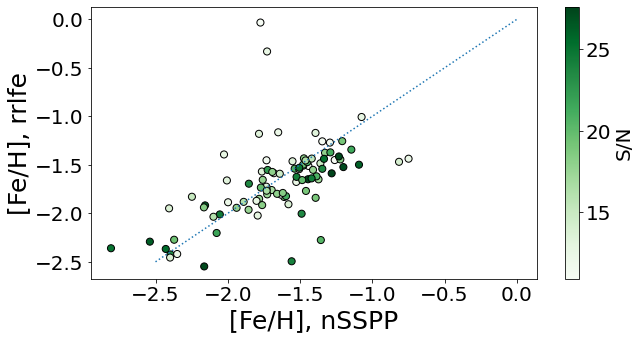

In [52]:
plt.figure(figsize=(10,5))
plt.scatter(df_merged_1["feh_direct_nsspp"], df_merged_1["feh_retrieved"], 
            c=df_merged_1["s_to_n"], cmap="Greens", s=50, edgecolors="k")
plt.plot([-2.5,0.0],[-2.5,0.0], linestyle=":")
plt.xlabel("[Fe/H], nSSPP", fontsize=25)
plt.ylabel("[Fe/H], rrlfe", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = plt.colorbar()
cbar.set_label("S/N",fontsize=20)
cbar.ax.tick_params(labelsize=20)
plt.show()